In [1]:
# importing required packages
import pandas as pd
import matplotlib.pyplot as plt
from numpy import log
from pylab import rcParams
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
import numpy as np

In [2]:
# reading our dataset
df = pd.read_csv('abc.csv', parse_dates=['date'], index_col='date')
df.head()

,so2,no2,rspm,spm
date,,,,
2004-01-01,6.433505,58.231014,238.330000,398.000000
2004-01-02,6.433505,58.231014,182.915000,346.500000
2004-01-03,6.433505,58.231014,136.960411,343.926778
2004-01-04,6.433505,58.231014,136.960411,343.926778
2004-01-05,6.433505,58.231014,160.000000,340.000000


## METHOD 1: Plotting

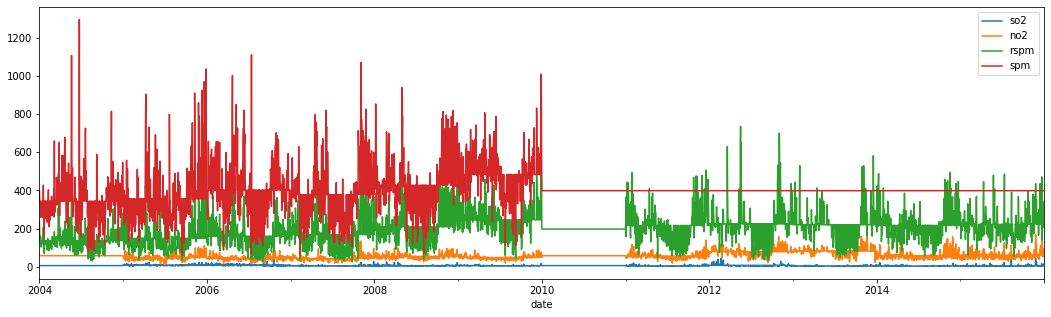

In [3]:
rcParams['figure.figsize'] = 18, 5
df.plot()
plt.show()

By, looking at the plot, the data looks stationary.

## METHOD 2: Summary Statistics

A quick and dirty check to see if time series is non-stationary is to review summary statistics.<br>
Splitting time series into six partitions and then comparing the mean and variance of each group. 
If they differ and the difference is statistically significant, the time series is likely non-stationary.

In [4]:
X = df.no2
X = log(X)
split = round(len(X) / 6)
X1, X2, X3, X4, X5, X6 = X[0:split], X[split+1:2*split], X[2*split+1:3*split], X[3*split+1:4*split], X[4*split+1:5*split], X[5*split+1:] 
mean1, mean2, mean3, mean4, mean5, mean6  = X1.mean(), X2.mean(), X3.mean(), X4.mean(), X5.mean(), X6.mean()
var1, var2, var3, var4, var5, var6 = X1.var(), X2.var(), X3.var(), X4.var(), X5.var(), X6.var()
print('mean1=%f, mean2=%f, mean3=%f, mean4=%f, mean5=%f, mean6=%f' % (mean1, mean2, mean3, mean4, mean5, mean6))
print('variance1=%f, variance2=%f, variance3=%f, variance4=%f, variance5=%f, variance6=%f' % (var1, var2, var3, var4, var5, var6))

mean1=3.963088, mean2=3.765487, mean3=3.929553, mean4=4.037840, mean5=4.372520, mean6=4.062307
variance1=0.047679, variance2=0.059823, variance3=0.045245, variance4=0.028651, variance5=0.056761, variance6=0.066604


In [5]:
X = df.so2
X = log(X)
split = round(len(X) / 6)
X1, X2, X3, X4, X5, X6 = X[0:split], X[split+1:2*split], X[2*split+1:3*split], X[3*split+1:4*split], X[4*split+1:5*split], X[5*split+1:]  
mean1, mean2, mean3, mean4, mean5, mean6  = X1.mean(), X2.mean(), X3.mean(), X4.mean(), X5.mean(), X6.mean()
var1, var2, var3, var4, var5, var6 = X1.var(), X2.var(), X3.var(), X4.var(), X5.var(), X6.var()
print('mean1=%f, mean2=%f, mean3=%f, mean4=%f, mean5=%f, mean6=%f' % (mean1, mean2, mean3, mean4, mean5, mean6))
print('variance1=%f, variance2=%f, variance3=%f, variance4=%f, variance5=%f, variance6=%f' % (var1, var2, var3, var4, var5, var6))

mean1=2.031377, mean2=1.903428, mean3=1.754480, mean4=1.732378, mean5=1.645611, mean6=1.562479
variance1=0.072138, variance2=0.186738, variance3=0.094371, variance4=0.081516, variance5=0.286911, variance6=0.125847


In [6]:
X = df.spm
X = log(X)
split = round(len(X) / 6)
X1, X2, X3, X4, X5, X6 = X[0:split], X[split+1:2*split], X[2*split+1:3*split], X[3*split+1:4*split], X[4*split+1:5*split], X[5*split+1:]   
mean1, mean2, mean3, mean4, mean5, mean6  = X1.mean(), X2.mean(), X3.mean(), X4.mean(), X5.mean(), X6.mean()
var1, var2, var3, var4, var5, var6 = X1.var(), X2.var(), X3.var(), X4.var(), X5.var(), X6.var()
print('mean1=%f, mean2=%f, mean3=%f, mean4=%f, mean5=%f, mean6=%f' % (mean1, mean2, mean3, mean4, mean5, mean6))
print('variance1=%f, variance2=%f, variance3=%f, variance4=%f, variance5=%f, variance6=%f' % (var1, var2, var3, var4, var5, var6))

mean1=5.791443, mean2=5.895324, mean3=6.075956, mean4=5.988121, mean5=5.987856, mean6=5.987856
variance1=0.136524, variance2=0.155402, variance3=0.099445, variance4=0.000051, variance5=0.000000, variance6=0.000000


In [7]:
X = df.rspm
X = log(X)
split = round(len(X) / 6)
X1, X2, X3, X4, X5, X6 = X[0:split], X[split+1:2*split], X[2*split+1:3*split], X[3*split+1:4*split], X[4*split+1:5*split], X[5*split+1:] 
mean1, mean2, mean3, mean4, mean5, mean6  = X1.mean(), X2.mean(), X3.mean(), X4.mean(), X5.mean(), X6.mean()
var1, var2, var3, var4, var5, var6 = X1.var(), X2.var(), X3.var(), X4.var(), X5.var(), X6.var()
print('mean1=%f, mean2=%f, mean3=%f, mean4=%f, mean5=%f, mean6=%f' % (mean1, mean2, mean3, mean4, mean5, mean6))
print('variance1=%f, variance2=%f, variance3=%f, variance4=%f, variance5=%f, variance6=%f' % (var1, var2, var3, var4, var5, var6))

mean1=4.879907, mean2=4.997236, mean3=5.359666, mean4=5.287686, mean5=5.333821, mean6=5.341207
variance1=0.164505, variance2=0.231908, variance3=0.147375, variance4=0.097646, variance5=0.164949, variance6=0.109532


Since the change is not drastic hence the dataset is stationary.

## METHOD 3: Mathematical tests

## Augmented Dickey-Fuller(ADF) test

It uses an autoregressive model and optimizes an information criterion across multiple different lag values.<br>

The null hypothesis of the test is that the time series can be represented by a unit root, that it is not stationary (has some time-dependent structure). The alternate hypothesis (rejecting the null hypothesis) is that the time series is stationary. <br>

<b>Null Hypothesis (H0): </b>If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure. <br>
<b>Alternate Hypothesis (H1): </b> The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.<br>

This result can be interpreted using the p-value from the test. A p-value below a threshold (such as 5% or 1%) suggests to reject the null hypothesis (stationary), otherwise a p-value above the threshold suggests to fail to reject the null hypothesis (non-stationary).<br>

<b>p-value > 0.05:</b> Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary. <br>
<b>p-value <= 0.05:</b> Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

In [8]:
NO2 = df.no2
result = adfuller(NO2)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.367070
p-value: 0.012134
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


In [9]:
SO2 = df.so2
result = adfuller(SO2)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.735804
p-value: 0.003637
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


In [10]:
SPM = df.spm
result = adfuller(SPM)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -6.164381
p-value: 0.000000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


In [11]:
RSPM = df.rspm
result = adfuller(RSPM)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -5.448897
p-value: 0.000003
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


p-value for all the pollutants is <b> less that 0.05</b> illustrating that the dataset is <b>stationary</b><br>

### References

<a> https://machinelearningmastery.com/time-series-data-stationary-python/ </a><br>
<a> https://www.itl.nist.gov/div898/handbook/pmc/section4/pmc442.htm </a><br>
<a> https://www.analyticsvidhya.com/blog/2018/09/non-stationary-time-series-python/ </a><br>
<a> https://people.duke.edu/~rnau/411diff.htm </a><br>
<a> https://www.investopedia.com/articles/trading/07/stationary.asp </a><br>
<a> https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.kpss.html </a><br>
<a> https://towardsdatascience.com/detecting-stationarity-in-time-series-data-d29e0a21e638 </a>